In [1]:
# Import dependencies:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read csv file consisting of cleaned data and store it in a dataframe:

data = "Data/cleaned_data.csv"
df = pd.read_csv(data)
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [3]:
# Keep only the features that we want to test, as determined in the feature importance portion of data cleanup:

df = df[['OverallQual',
 'GrLivArea',
 '2ndFlrSF',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'LotArea',
 'GarageCars',
 'SalePrice']]

df.head()

,OverallQual,GrLivArea,2ndFlrSF,BsmtFinSF1,TotalBsmtSF,1stFlrSF,FullBath,LotArea,GarageCars,SalePrice
0,7,1710,854,706,856,856,2,8450,2,208500
1,6,1262,0,978,1262,1262,2,9600,2,181500
2,7,1786,866,486,920,920,2,11250,2,223500
3,7,1717,756,216,756,961,1,9550,3,140000
4,8,2198,1053,655,1145,1145,2,14260,3,250000


In [4]:
# Extract the target variable from dataset:

X = df.drop(columns = ["SalePrice"])
Y = df["SalePrice"]

In [5]:
# Split data into train and test datasets:

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [6]:
# Create and fit linear regression model to train dataset:

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# Make predictions using the model:

predictions = model.predict(x_test)

In [8]:
y_test.to_numpy(dtype=None, copy=False)

array([154000, 118500,  91000, 154500, 151400, 267000, 239000, 100000,
       164500, 101000, 160000, 124900, 189000, 178000, 112000, 186700,
       107000, 128000, 385000, 167500, 290000, 140000, 125000, 119500,
       129000, 122500, 124500, 180000, 154300, 325624,  73000, 108959,
       139000, 424870, 320000, 245500, 139000, 312500, 174900, 142600,
       181000, 257000, 415298, 183500, 394617, 139000, 250000, 369900,
       225000, 319000, 328900, 135000, 205000, 163990, 201000, 171000,
       116050, 153575, 228000, 124000, 178000, 280000, 102000, 129000,
       277500, 107400, 177000, 185000, 180500, 107900, 130000, 122900,
       131500, 139000, 171000, 337500, 270000, 201000, 194700, 175000,
       134450, 285000, 192000, 197000, 174000, 147000, 141000, 180000,
       164000, 625000, 319900, 202500, 183900, 224500, 156000, 135000,
       230000, 160000, 354000, 201000, 335000, 167900, 236500, 214000,
       326000, 213000, 286000, 118000, 241500, 195000, 155000, 211000,
      

In [9]:
# Determine mean_squared_error and model accuracy score:

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(x_test, y_test)

In [10]:
# Print mean squared error and model accuracy score:

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1320618136.1664312, R2: 0.7998199431072023


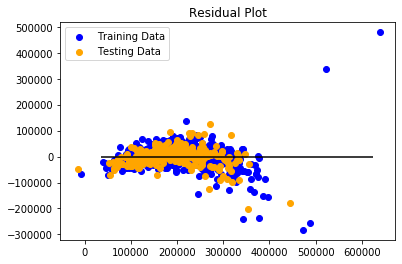

In [11]:
# Plot the model's predicted values and actual values:

plt.scatter(model.predict(x_train), model.predict(x_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(x_train, y_train)

predictions = lasso.predict(x_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(x_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(x_train, y_train)

predictions = ridge.predict(x_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(x_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(x_train, y_train)

predictions = elasticnet.predict(x_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(x_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")